In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Explore Dataset

In [4]:
# Import .csv file
foodFactData = pd.read_csv("FoodFacts.csv", low_memory=False)
print(foodFactData.shape)

(65503, 159)


#### Number of rows : 65502 (no. of products)
#### Number of colums: 159 (attributes)

### First let explore data using 'countries' attribute
##### Unique countries in data

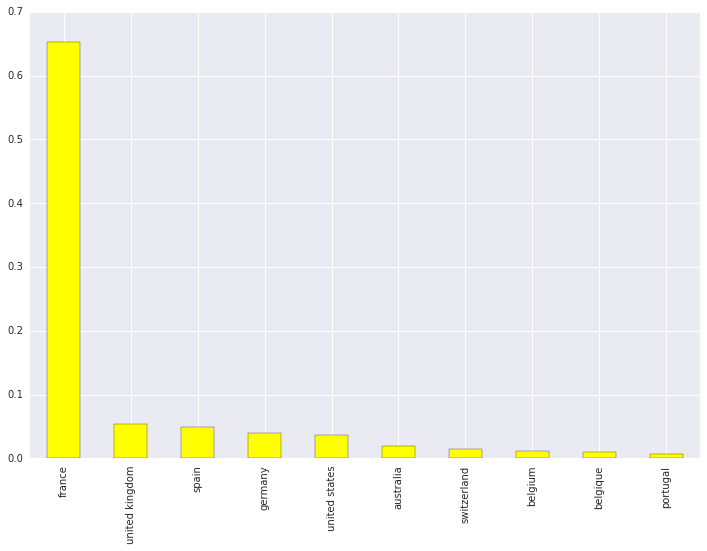

In [32]:
# Now plot the frequencies of the country in dataset
plt.figure(figsize=(12,8))
foodFactData.countries.value_counts(normalize=True).head(10).plot(kind='bar', color="yellow")

#As we observe that *France* and *en:FR* both are same , one is country name and other seems to be code or shortened name so we need to change en:FR to France to remove such duplicacy.
#Similarly we change in some more data which occur frequently *us* to *united states* , *holland* to *netherlands* etc.

In [6]:
foodFactData.countries=foodFactData.countries.str.lower()
foodFactData.loc[foodFactData['countries'] == 'en:fr', 'countries'] = 'france'
foodFactData.loc[foodFactData['countries'] == 'en:es', 'countries'] = 'spain'
foodFactData.loc[foodFactData['countries'] == 'en:gb', 'countries']='united kingdom'
foodFactData.loc[foodFactData['countries'] == 'en:uk', 'countries']='united kingdom'
foodFactData.loc[foodFactData['countries'] == 'holland','countries']='netherlands'
foodFactData.loc[foodFactData['countries'] == 'españa','countries']='spain'
foodFactData.loc[foodFactData['countries'] == 'us','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'en:us','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'usa','countries']='united states'
foodFactData.loc[foodFactData['countries'] == 'en:cn','countries']='canada'
foodFactData.loc[foodFactData['countries'] == 'en:au','countries']='australia'
foodFactData.loc[foodFactData['countries'] == 'en:de','countries']='germany'
foodFactData.loc[foodFactData['countries'] == 'deutschland','countries']='germany'
foodFactData.loc[foodFactData['countries'] == 'en:cn','countries']='china'
foodFactData.loc[foodFactData['countries'] == 'en:be','countries']='belgium'
foodFactData.loc[foodFactData['countries'] == 'en:ch','countries']='switzerland'

In [7]:
# For better visualization purpose , import seaborn library
import seaborn as sns

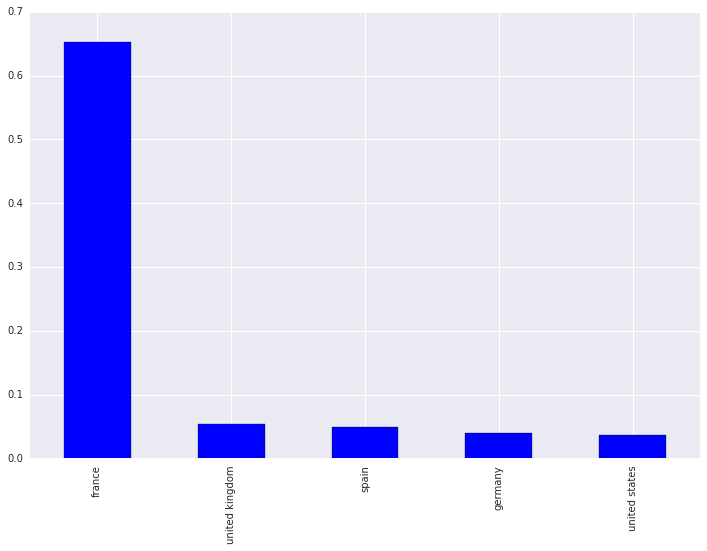

In [8]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
# Now plot possibly top five countries in this dataset
foodFactData.countries.value_counts(normalize=True).head().plot(kind='bar')

In [9]:
foodFactData[foodFactData['countries'] == 'france'].countries.value_counts()

france    42767
Name: countries, dtype: int64

##### Majority of the Product in this data sold in France 

## Explore other attributes 

### Order of top 5 countries in consuming Fruits and Vegetables 

In [10]:
top_countries = ['france','united kingdom','spain','germany','united states' ]
fruits_vegetables_nuts=[]
# Loop through all top five countries 
for country in top_countries:
    fruits_vegetables_nuts.append(getattr(foodFactData[foodFactData.countries==country], 'fruits_vegetables_nuts_100g').mean())

# We can combine two lists to form a Data Frame
# countriesDF=pd.DataFrame(dict(country=pd.Series(top_countries),mean=pd.Series(fruits_vegetables_nuts)))

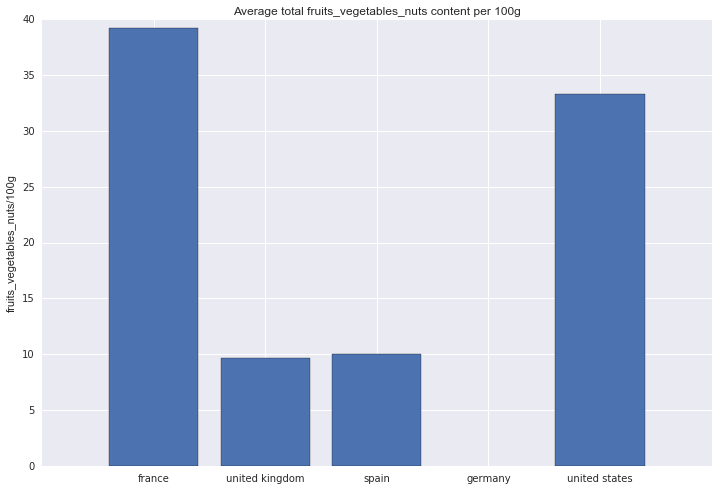

In [11]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(top_countries))
    
plt.bar(y_pos,fruits_vegetables_nuts, align='center')
plt.title('Average total fruits_vegetables_nuts content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('fruits_vegetables_nuts/100g') 
plt.show()

### Order of top 5 countries in consuming Alcohol

In [12]:
alcohol=[]
# Loop through all top five countries 
for country in top_countries:
    alcohol.append(getattr(foodFactData[foodFactData.countries==country], 'alcohol_100g').mean())

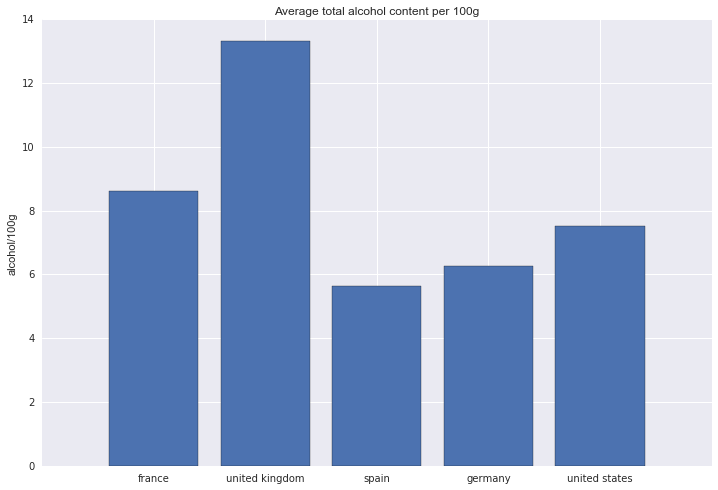

In [13]:
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,alcohol, align='center')
plt.title('Average total alcohol content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('alcohol/100g')    
plt.show()

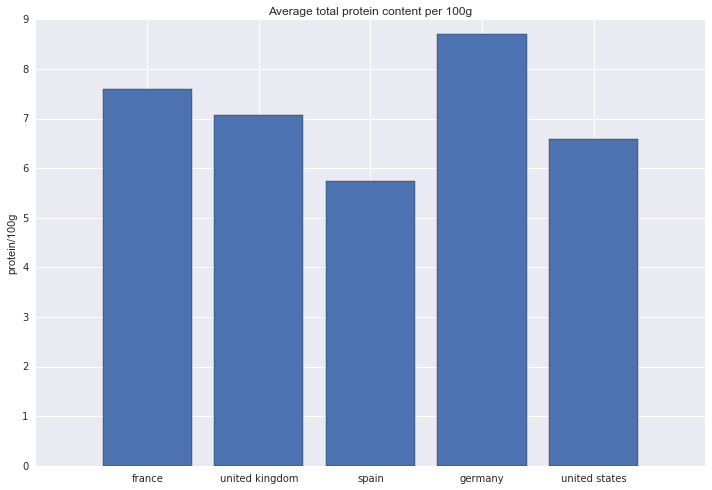

In [14]:
proteins=[]
# Loop through all top five countries 
for country in top_countries:
    proteins.append(getattr(foodFactData[foodFactData.countries==country], 'proteins_100g').mean())
    
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,proteins, align='center')
plt.title('Average total protein content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('protein/100g')    
plt.show()

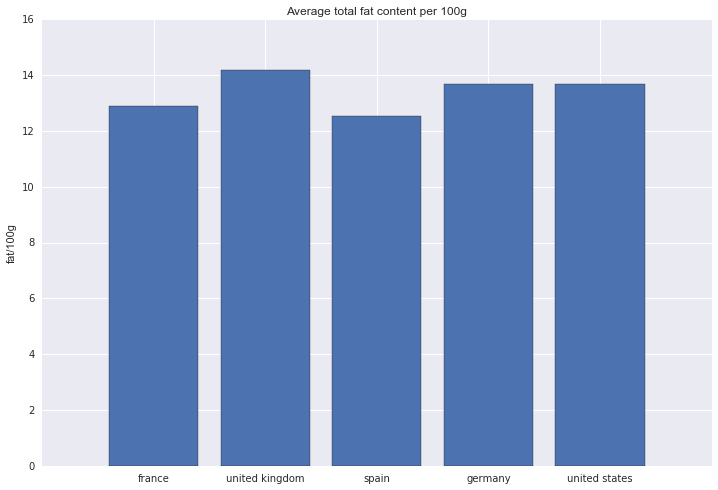

In [15]:
fat=[]
# Loop through all top five countries 
for country in top_countries:
    fat.append(getattr(foodFactData[foodFactData.countries==country], 'fat_100g').mean())
    
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,fat, align='center')
plt.title('Average total fat content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('fat/100g')    
plt.show()

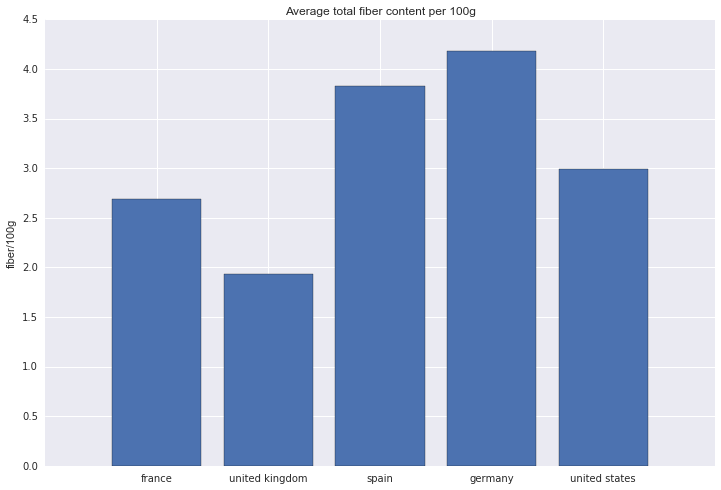

In [16]:
fiber=[]
# Loop through all top five countries 
for country in top_countries:
    fiber.append(getattr(foodFactData[foodFactData.countries==country], 'fiber_100g').mean())
    
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,fiber, align='center')
plt.title('Average total fiber content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('fiber/100g')    
plt.show()

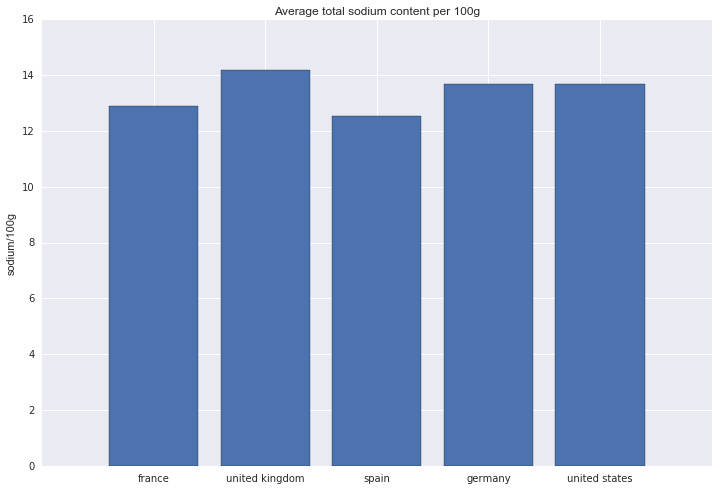

In [17]:
sodium=[]
# Loop through all top five countries 
for country in top_countries:
    sodium.append(getattr(foodFactData[foodFactData.countries==country], 'sodium_100g').mean())
    
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,fat, align='center')
plt.title('Average total sodium content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('sodium/100g')    
plt.show()

In [30]:
#Removing all columns containing only NaN:
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
NumericData = foodFactData.dropna(axis=1, how='all')

#Same result, going manually to remove columns one by one:
#NumericData = foodFactData.drop("no_nutriments", axis=1).drop("ingredients_that_may_be_from_palm_oil", axis=1).drop("nutrition_grade_uk", axis=1)
#.drop("butyric_acid_100g", axis=1).drop("caproic_acid_100g", axis=1).drop("nutrition_grade_uk", axis=1)
#.drop("ingredients_from_palm_oil", axis=1)


NumericData.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,43664.000000,43664.000000,43664.000000,36374.000000,733.000000,36362.000000,32429.000000,1.0,1.0,3.000000,...,1.150000e+02,36.000000,16.000000,35.000000,1029.000000,109.000000,432.000000,180.000000,31294.000000,31294.000000
mean,1.745946,0.055057,0.133291,1075.391375,579.993533,13.028351,5.158653,7.4,6.2,32.781577,...,6.527479e-04,1.749925,0.142819,6.349406,38.089038,15.651376,50.804167,386.573671,7.948169,7.687192
std,2.500765,0.230392,0.435266,786.395301,694.899419,17.221408,7.902021,NaN,NaN,28.351338,...,1.664324e-03,6.206093,0.174242,2.058607,24.115107,4.146342,19.493478,453.848230,9.107222,9.501685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.4,6.2,0.044730,...,3.600000e-09,0.003000,0.001800,0.005000,1.400000,8.000000,6.300000,0.000000,-14.000000,-14.000000
25%,0.000000,0.000000,0.000000,367.000000,43.800000,1.000000,0.220000,7.4,6.2,24.522365,...,2.050000e-05,0.018000,0.035000,6.450000,12.000000,12.000000,32.000000,129.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,977.000000,300.000000,5.800000,1.800000,7.4,6.2,49.000000,...,6.500000e-05,0.025000,0.037500,7.000000,41.300000,15.000000,50.500000,224.200000,7.000000,5.000000
75%,3.000000,0.000000,0.000000,1629.000000,929.000000,21.000000,7.000000,7.4,6.2,49.150000,...,1.270000e-04,0.044750,0.327250,7.260000,53.000000,15.000000,70.000000,497.750000,15.000000,16.000000
max,26.000000,2.000000,6.000000,4134.000000,3740.000000,101.000000,100.000000,7.4,6.2,49.300000,...,1.470000e-02,32.000000,0.423000,7.900000,100.000000,25.000000,100.000000,2842.000000,35.000000,33.000000


C:\Users\Romain\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Romain\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


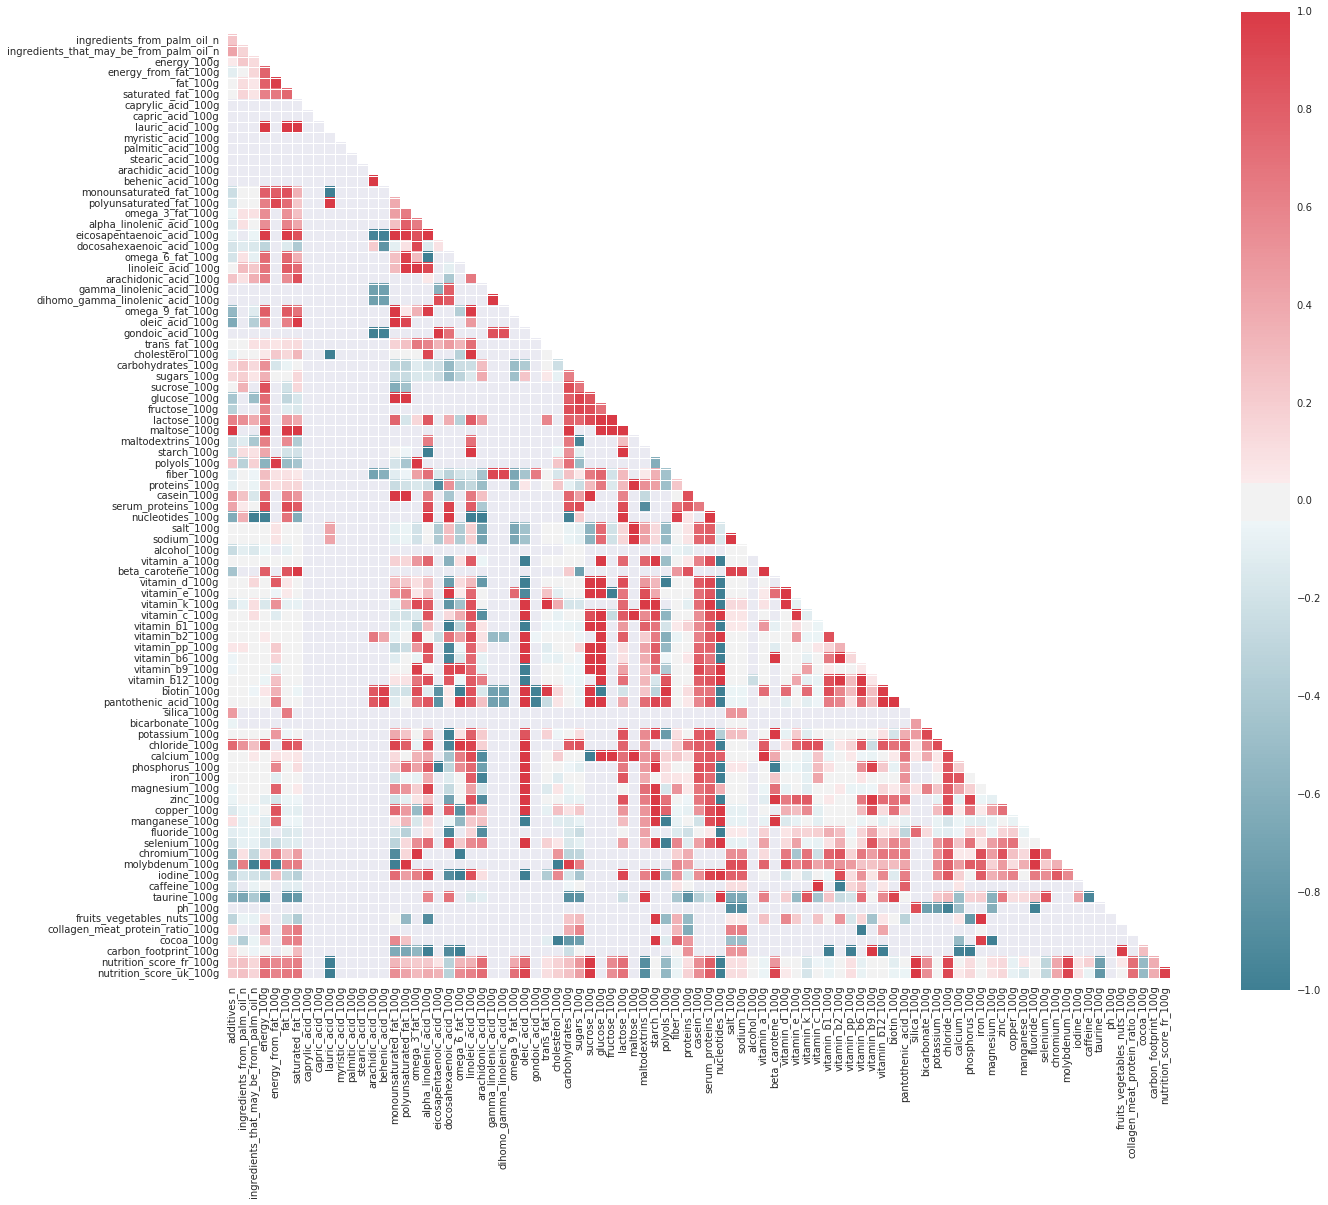

In [34]:
#Select only particular columns
    #
    #
    #
    #
    #
    
Subselect = NumericData



sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(NumericData, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()